# Task 2

# Problem Statement 1: Machine Learning

# Your task is to help John from STA IT services to create a linear regression model in Python or R to predict the CTC/Salary of new hires from the data provided.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Data_file.xlsx - Data.csv",names=["S.No","College","Role","City",
                                                    "Previous_CTC","Previous_job_changes",
                                                    "Graduation_marks","Exp_Months",
                                                    "CTC"])
df

,S.No,College,Role,City,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_Months,CTC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
3,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
4,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
...,...,...,...,...,...,...,...,...,...
1336,1334,Tier 3,Executive,Metro,"59,661.00",4,68,50,"69,712.40"
1337,1335,Tier 1,Executive,Non-Metro,"53,714.00",1,67,18,"69,298.75"
1338,1336,Tier 2,Executive,Non-Metro,"61,957.00",1,47,18,"66,397.77"
1339,1337,Tier 1,Executive,Non-Metro,"53,203.00",3,69,21,"64,044.38"


In [3]:
df.drop("S.No", axis=1, inplace=True)
df

,College,Role,City,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_Months,CTC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
3,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
4,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
...,...,...,...,...,...,...,...,...
1336,Tier 3,Executive,Metro,"59,661.00",4,68,50,"69,712.40"
1337,Tier 1,Executive,Non-Metro,"53,714.00",1,67,18,"69,298.75"
1338,Tier 2,Executive,Non-Metro,"61,957.00",1,47,18,"66,397.77"
1339,Tier 1,Executive,Non-Metro,"53,203.00",3,69,21,"64,044.38"


In [4]:
df.drop([0,1,2],inplace=True)

In [5]:
df

,College,Role,City,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_Months,CTC
3,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
4,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
5,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
6,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
7,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"
...,...,...,...,...,...,...,...,...
1336,Tier 3,Executive,Metro,"59,661.00",4,68,50,"69,712.40"
1337,Tier 1,Executive,Non-Metro,"53,714.00",1,67,18,"69,298.75"
1338,Tier 2,Executive,Non-Metro,"61,957.00",1,47,18,"66,397.77"
1339,Tier 1,Executive,Non-Metro,"53,203.00",3,69,21,"64,044.38"


In [6]:
df = df.assign(Index=range(len(df))).set_index('Index')
df.head()

,College,Role,City,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_Months,CTC
Index,,,,,,,,
0,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"


In [7]:
df.isnull().sum()

College                 0
Role                    0
City                    0
Previous_CTC            0
Previous_job_changes    0
Graduation_marks        0
Exp_Months              0
CTC                     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   College               1338 non-null   object
 1   Role                  1338 non-null   object
 2   City                  1338 non-null   object
 3   Previous_CTC          1338 non-null   object
 4   Previous_job_changes  1338 non-null   object
 5   Graduation_marks      1338 non-null   object
 6   Exp_Months            1338 non-null   object
 7   CTC                   1338 non-null   object
dtypes: object(8)
memory usage: 94.1+ KB


In [9]:
# We can see all the data are in categorical form but numbers should be in integer form so we have to convert

In [10]:
df.Previous_CTC = df.Previous_CTC.str.strip()

In [11]:
df["Previous_CTC"] = [float(str(i).replace(",", "")) for i in df["Previous_CTC"]]

In [12]:
df["CTC"] = df.CTC.str.strip()

In [13]:
df["CTC"] = [float(str(i).replace(",", "")) for i in df["CTC"]]

In [14]:
df.columns

Index(['College', 'Role', 'City', 'Previous_CTC', 'Previous_job_changes',
       'Graduation_marks', 'Exp_Months', 'CTC'],
      dtype='object')

In [15]:
df['Exp_Months']=df['Exp_Months'].astype('int')

In [16]:
df['Previous_job_changes']=df['Previous_job_changes'].astype('float')
df['Graduation_marks']=df['Graduation_marks'].astype('float')
df['Exp_Months']=df['Exp_Months'].astype('float')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City                  1338 non-null   object 
 3   Previous_CTC          1338 non-null   float64
 4   Previous_job_changes  1338 non-null   float64
 5   Graduation_marks      1338 non-null   float64
 6   Exp_Months            1338 non-null   float64
 7   CTC                   1338 non-null   float64
dtypes: float64(5), object(3)
memory usage: 94.1+ KB


# EDA

<AxesSubplot:>

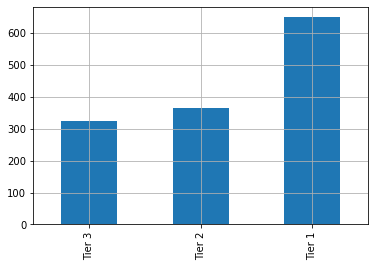

In [18]:
# look at all values 
df.College.value_counts().sort_index(ascending=False).plot(kind='bar',grid=True)

<AxesSubplot:>

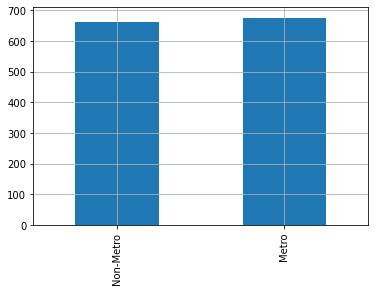

In [19]:
df.City.value_counts().sort_index(ascending=False).plot(kind='bar',grid=True)

<AxesSubplot:>

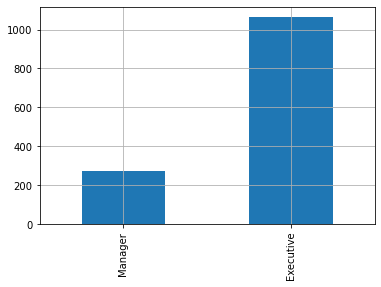

In [20]:
df.Role.value_counts().sort_index(ascending=False).plot(kind='bar',grid=True)

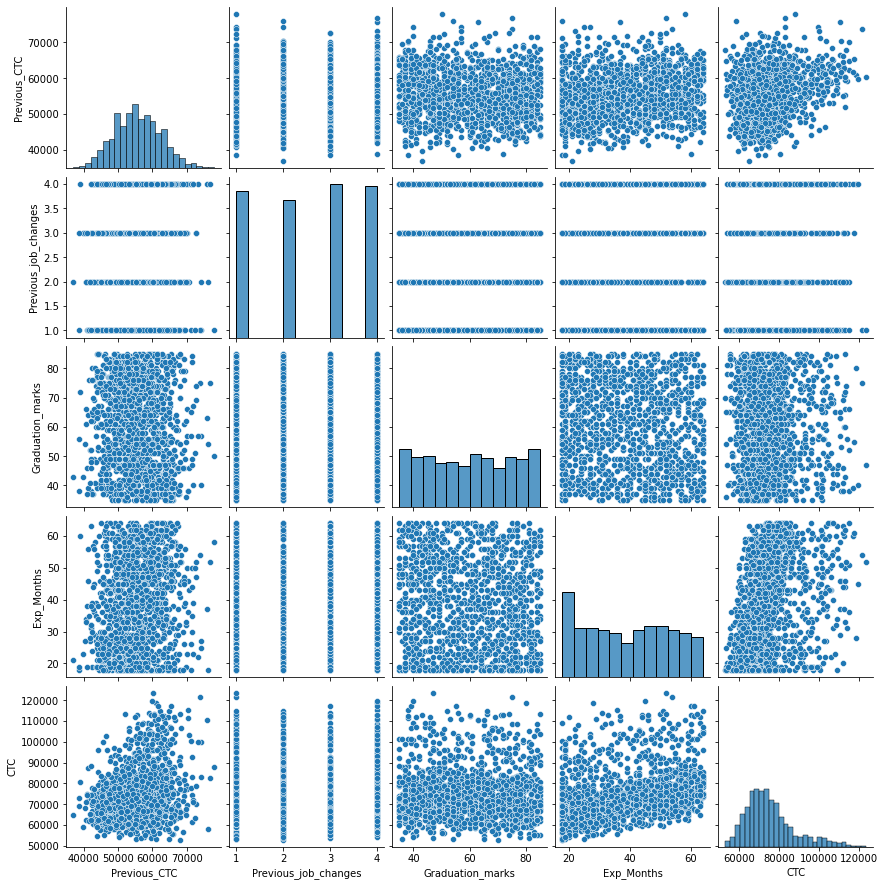

In [21]:
sns.pairplot(df)

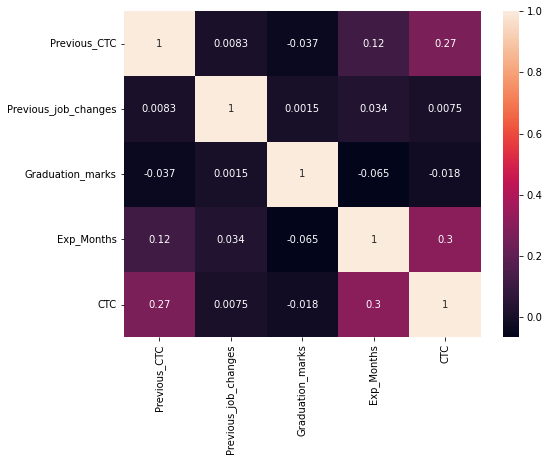

In [22]:
X=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(X,annot=True)
plt.show()

In [23]:
categorical = df.select_dtypes(include=['object'])

categorical.head()

,College,Role,City
Index,,,
0,Tier 1,Manager,Non-Metro
1,Tier 2,Executive,Metro
2,Tier 2,Executive,Metro
3,Tier 3,Executive,Metro
4,Tier 3,Executive,Metro


In [24]:
numerical = df.select_dtypes(include=['int64', 'float64','int32'])

numerical.head()

,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_Months,CTC
Index,,,,,
0,55523.0,3.0,66.0,19.0,71406.58
1,57081.0,1.0,84.0,18.0,68005.87
2,60347.0,2.0,52.0,28.0,76764.02
3,49010.0,2.0,81.0,33.0,82092.39
4,57879.0,4.0,74.0,32.0,73878.10


In [25]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_cat = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))

df_cat.head()

,College_Tier 2,College_Tier 3,Role_Manager,City_Non-Metro
0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [26]:
df= pd.concat([ df_cat,numerical], axis=1)
df.tail()

,College_Tier 2,College_Tier 3,Role_Manager,City_Non-Metro,Previous_CTC,Previous_job_changes,Graduation_marks,Exp_Months,CTC
1333,0.0,1.0,0.0,0.0,59661.0,4.0,68.0,50.0,69712.40
1334,0.0,0.0,0.0,1.0,53714.0,1.0,67.0,18.0,69298.75
1335,1.0,0.0,0.0,1.0,61957.0,1.0,47.0,18.0,66397.77
1336,0.0,0.0,0.0,1.0,53203.0,3.0,69.0,21.0,64044.38
1337,0.0,1.0,1.0,1.0,51820.0,1.0,47.0,61.0,83346.06


In [27]:
df.columns

Index(['College_Tier 2', 'College_Tier 3', 'Role_Manager', 'City_Non-Metro',
       'Previous_CTC', 'Previous_job_changes', 'Graduation_marks',
       'Exp_Months', 'CTC'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College_Tier 2        1338 non-null   float64
 1   College_Tier 3        1338 non-null   float64
 2   Role_Manager          1338 non-null   float64
 3   City_Non-Metro        1338 non-null   float64
 4   Previous_CTC          1338 non-null   float64
 5   Previous_job_changes  1338 non-null   float64
 6   Graduation_marks      1338 non-null   float64
 7   Exp_Months            1338 non-null   float64
 8   CTC                   1338 non-null   float64
dtypes: float64(9)
memory usage: 94.2 KB


In [29]:
target = df['CTC']
data = df[['College_Tier 2', 'College_Tier 3', 'Role_Manager', 'City_Non-Metro',
       'Previous_CTC', 'Previous_job_changes', 'Graduation_marks',
       'Exp_Months',]]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8, \
                                                    random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1070, 8) (1070,)
(268, 8) (268,)


In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
print('y intercept: ',regressor.intercept_)
print('slope: ',regressor.coef_)

y intercept:  41504.865956297595
slope:  [-5.44951143e+03 -4.63945525e+03  1.90816746e+04 -4.26805308e+03
  4.62087842e-01 -1.34318218e+02 -7.15906889e+00  2.51817537e+02]


In [33]:
regressor.score(X_train, y_train)*100

59.00885852227668

# Prediction


In [34]:
test=pd.read_csv("Test_data_file.xlsx - Prediction.csv")
test

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
test.columns

Index(['College', 'Role', 'City type', 'College_T1', 'College_T2',
       'Role_Manager', 'City_Metro', 'previous CTC', 'previous job changes',
       'Graduation marks', 'Exp', 'Actual CTC', 'Predicted CTC', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [36]:
test.drop(['College', 'Role', 'City type','Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23','Actual CTC', 'Predicted CTC'],axis=1,inplace=True)

In [37]:
test.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp
0,1,0,1,0,55523,3,66,19
1,0,1,0,1,57081,1,84,18
2,0,1,0,1,60347,2,52,28
3,0,0,0,1,49010,2,81,33
4,0,0,0,1,57879,4,74,32


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   College_T1            1338 non-null   int64
 1   College_T2            1338 non-null   int64
 2   Role_Manager          1338 non-null   int64
 3   City_Metro            1338 non-null   int64
 4   previous CTC          1338 non-null   int64
 5   previous job changes  1338 non-null   int64
 6   Graduation marks      1338 non-null   int64
 7   Exp                   1338 non-null   int64
dtypes: int64(8)
memory usage: 83.8 KB


In [39]:
pred = regressor.predict(test)

In [40]:
submission=pd.DataFrame(pred,columns=["Predicted CTC"])

In [41]:
submission

,Predicted CTC
0,84702.612339
1,62770.829369
2,66892.955613
3,67345.195690
4,70973.112266
...,...
1333,76372.222874
1334,64794.680683
1335,69556.908315
1336,65031.051832


In [42]:
submission.to_csv("submission.csv",index=False)

# <center><b>Thank You<b><center>